# REAL ESTATE ANALYSIS

## 1.Research Question

To analyse the factors that affect housing prices on real estate properties.In an effort to create a model that would allow the company to accurately predict the sale of prices

## 2.Reading The Dataset

In [1]:
#importing the libraries to be used
import pandas as pd
import numpy as np
%pip install pyshp
import shapefile as shp
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy as sp
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

     |████████████████████████████████| 225kB 11.7MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36216 sha256=b6d34345f122db235c6688765aef66ab06a6bbcd5b614658ba64103a847bf71f
  Stored in directory: /root/.cache/pip/wheels/96/6c/53/4112475adf3b831da97f083163d0f38ee6daac9c1b13f7afea
Successfully built pyshp


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
house = pd.read_csv('house_data.csv')
house

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#preliminary overview of first entries
house.head(10)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
#preliminary overview of the last entries
house.tail(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,1010000.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
#Column overview
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#summary statistics
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#general info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
#Determining no.of records in the dataset
house.shape

(21613, 20)

## 3.Data Source Validation

From the vast 25 years experience working in this firm 
Since the dataset is from a private company/(possibly from an intranet) using external data source would not prove credibility as they could originate from different geographical locations and company privacy policy allows access only  to documents to be used in current analyses
 

# 4.Data Description

In this particular dataset the various terms to be elaborated below are basically the factors that a buyer and seller of any type of real estate deal will have to consider in both sides 


*   ID = Basically this is the unique code of various properties in possession to the Firm 
*  PRICE = This is the value of each property
* BEDROOMS = Number of Bedrooms in the property
* BATHROOMS = Number of Bathrooms  in the property
* SQFT_LIVING = Square feet area of the living area
* SQFT_LOT = Square feet of the parking layout
* FLOORS = Number of floors
* WATERFRONT = Presence of a waterfront
* VIEW = Number of views
* CONDITION = State of property
* Grade = Quality of property
* SQFT_ABOVE = Square feet area of the top section
* SQFT_BASEMENT = Square feet area of the area off basement
* YR_BUILT = Year the house was built
* YR_RENOVATED = Year the house was renovated
* ZIPCODE = Zipcode of the property
* LAT = Latitude
* LONG = Longitude 
* SQFT_LIVING15
* SQFT_LOT15



# 5.Data Cleaning

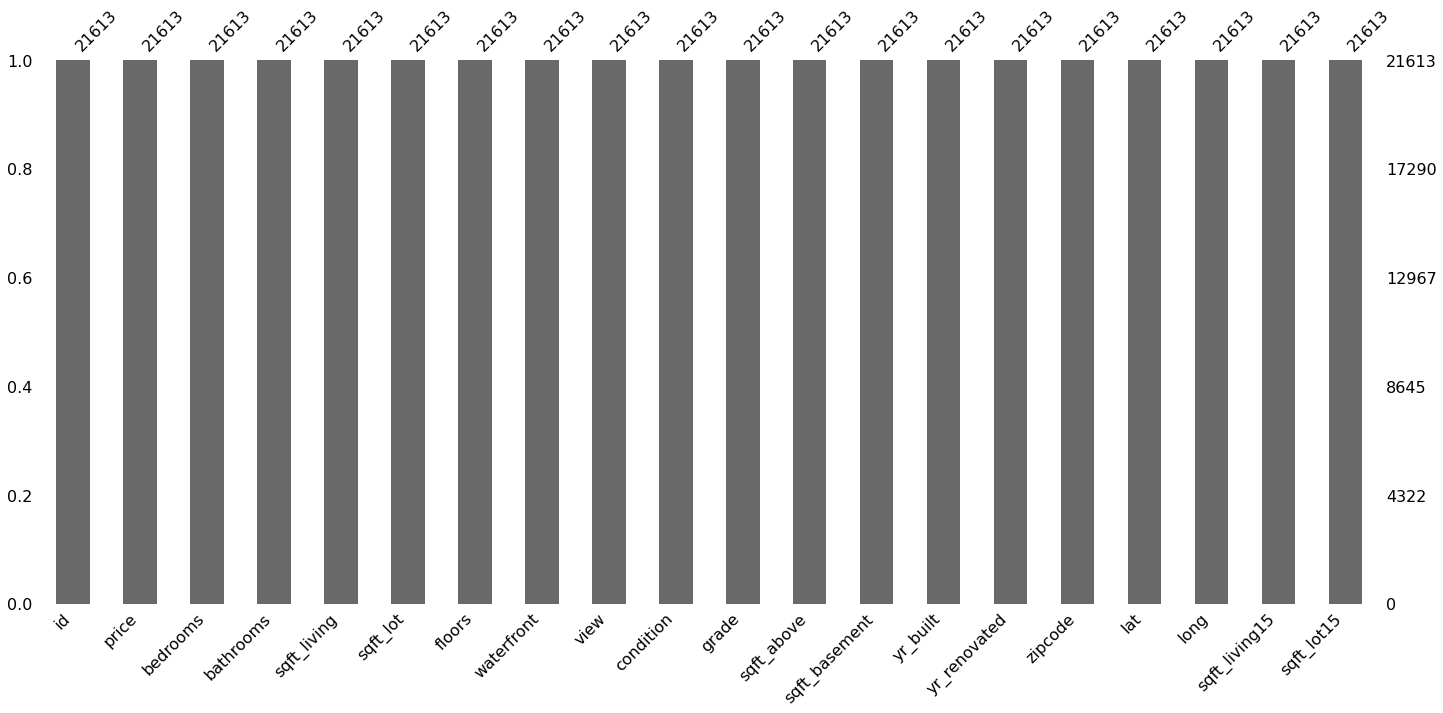

In [3]:
#Missing Data Analysis
#In order to visualize missing value, package missingno is used. 
#First bar plot is used to get the missing value. The column which will have missing value, show small length of bar.
msno.bar(house)
plt.show()

In [4]:
#Confirmation of checking of null values
house.isnull().sum().any

<bound method Series.any of id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64>

FROM THE TWO CODES ABOVE WE CAN SEE THAT THERE IS NO NULL VALUES IN THE CURRENT DATASET

In [5]:
#Creating keys for each column variable for future need be
house_price = house.price
house_bed = house.bedrooms
house_bath = house.bathrooms
house_living = house.sqft_living
house_lot = house.sqft_lot
house_floor = house.floors
house_water = house.waterfront
house_view = house.view
house_cond = house.condition
house_grade = house.grade
house_above = house.sqft_above
house_base = house.sqft_basement
house_built = house.yr_built
house_renov = house.yr_renovated
house_zip = house.zipcode
house_lat = house.lat
house_long = house.long
house_living15 = house.sqft_living15
house_lot15 = house.sqft_lot15
#This one below is a collection of all keys to be used for joined visualization if needed
house_data = (house_price,house_bed,house_bath,house_living,house_lot,house_floor,house_water,house_view,house_cond,house_grade,house_above,house_base,house_built,house_renov,house_zip,house_lat,house_long,house_living15,house_lot15)

In [6]:
# CHECKING FOR OUTLIERS
fig = plt.figure(figsize =(10, 7))
sns.boxplot(house_data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: ignored

<Figure size 720x504 with 0 Axes>

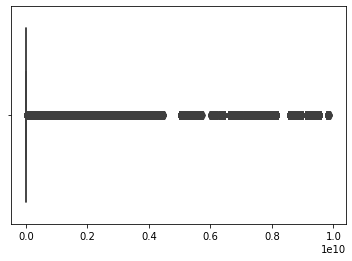

In [ ]:
sns.boxplot(house)

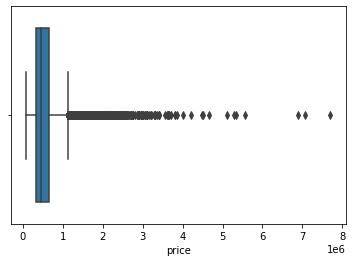

In [ ]:
sns.boxplot(house_price)

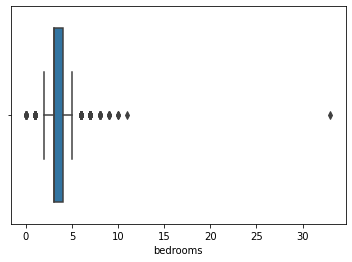

In [ ]:
sns.boxplot(house_bed)

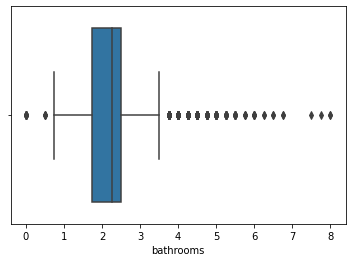

In [ ]:
sns.boxplot(house_bath)

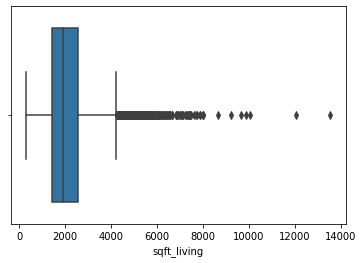

In [ ]:
sns.boxplot(house_living)

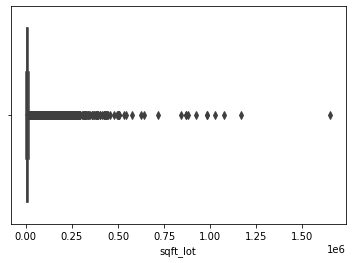

In [ ]:
sns.boxplot(house_lot)

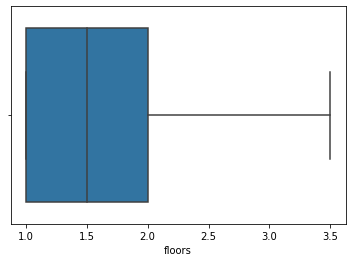

In [ ]:
sns.boxplot(house_floor)

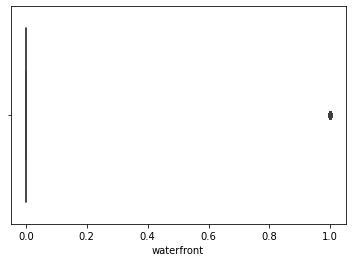

In [ ]:
sns.boxplot(house_water)

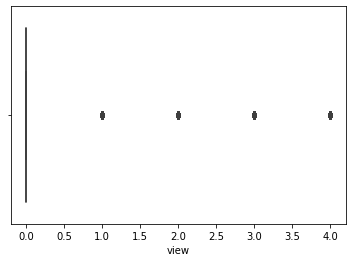

In [ ]:
sns.boxplot(house_view)

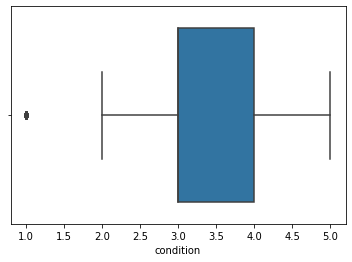

In [ ]:
sns.boxplot(house_cond)

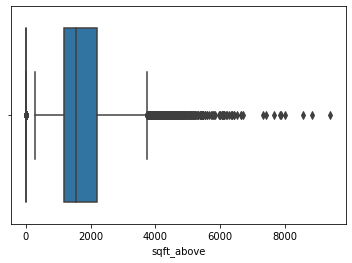

In [ ]:
sns.boxplot(house_grade)
sns.boxplot(house_above)

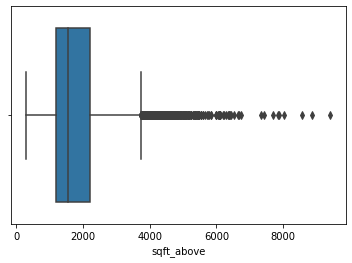

In [ ]:
sns.boxplot(house_above)

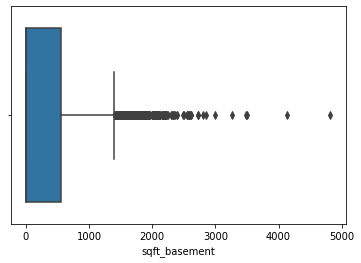

In [ ]:
sns.boxplot(house_base)

FROM THE OUTLIERS SECTION WE HAVE  SEEN THAT A GOOD NUMBER OF DATA HAS OUTLIERS BUT DUE TO THE NATURE OF THE  DATASET WHERE  WE HAVE VARIABLES SUCH AS THE ONES WITH AREA,NO OF ROOMSVIEW AND PRESENCE OF WATERFRONT OR NOT ETC... WE CAN SEE THAT WE CANNOT REMOVE THEM AS THEY CONTRIBUTE TO PREDICTIVE ANALYTICS AS IN A REAL ESTATE FIRM USUALLY CONSIDERING MOST VARIABLES MIGHT DIFFER AS THE HOUSES ARE BUILT FOR BASICALLY A RANGE OF PEOPLE FROM A CERTAIN WALK OF LIFE THEY TARGET SO THAT ALL OPTIONS AND TYPES ARE CONSIDERED WHEN DEALING IN REAL ESTATE

## 6.Exploratory Analysis

### A). Univariate Analysis

In [ ]:
#summary statistics
sum_stat = house.describe()
sum_stat

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#skewness
house.skew()

id                0.243329
price             4.021716
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

**SKEWNESS**: Here we can see that only latitude and year built are skewed to the left while the rest are skewed to the right



In [ ]:
#kurtosis
house.kurt()

id                -1.260542
price             34.522444
bedrooms          49.063653
bathrooms          1.279902
sqft_living        5.243093
sqft_lot         285.077820
floors            -0.484723
waterfront       127.632494
view              10.893022
condition          0.525764
grade              1.190932
sqft_above         3.402304
sqft_basement      2.715574
yr_built          -0.657408
yr_renovated      18.701152
zipcode           -0.853479
lat               -0.676313
long               1.049501
sqft_living15      1.597096
sqft_lot15       150.763110
dtype: float64

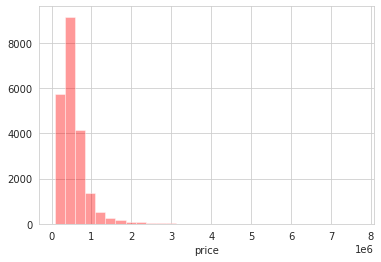

In [ ]:
#Checking the distribution of price
sns.set_style('whitegrid') 
sns.distplot(house_price, kde = False, color ='red', bins = 30)

In [ ]:
#Checking at the geographical location of the properties
map_data = (house_lat,house_long)
house_map = folium.Map(map_data)#,zoom_start=8)
house_map

In [ ]:
#sns.set(style="whitegrid", palette="pastel", color_codes=True)
#sns.mpl.rc(map_data, figsize=(10,6))

### B).Bivariate analysis

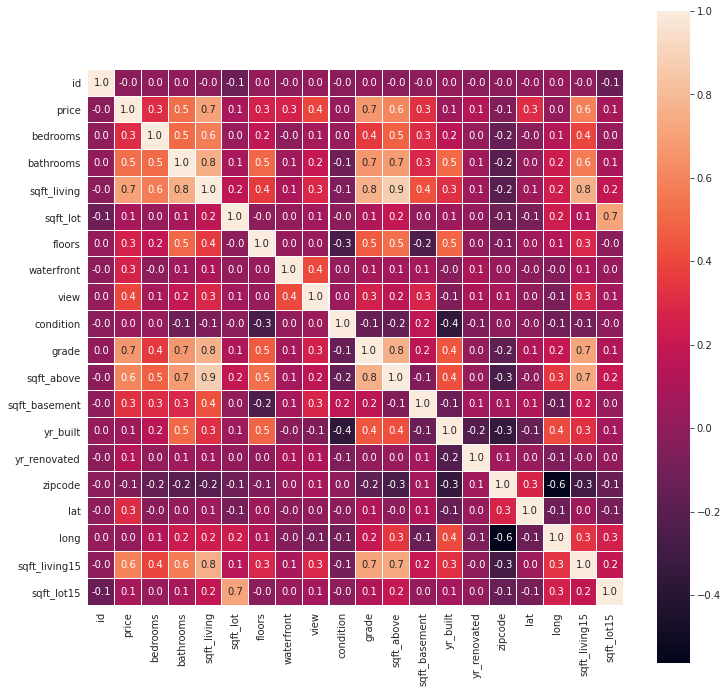

In [ ]:
#FINDING THE CORELATION BETWEEN THE VARIOUS VARIABLES
f,ax = plt.subplots(figsize = (12, 12))
sns.heatmap(house.corr(),annot=True, linewidths = 0.1, fmt = '.1f', ax = ax, square = True)
plt.show()

FROM THE ABOVE HEATMAP THE SQUARE FEET AREA OF THE LIVING,GRADE,SQUARE FEET AREA OF LIVING 15,SQUARE FEET AREA ABOVE AND THE NUMBER OF BATHROOMS.

Text(0.5, 1.0, 'Relationship between Price and Sqft living')

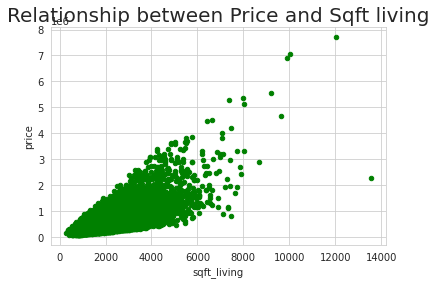

In [ ]:
#COREALTION BETWEEN PRICE AND SQUARE FEET AREA OF THE LIVING
house.plot.scatter(x = 'sqft_living' , y = 'price' ,color='Green')
plt.title('Relationship between Price and Sqft living', fontsize = 20)

Text(0.5, 1.0, 'Relationship between Price and Grade')

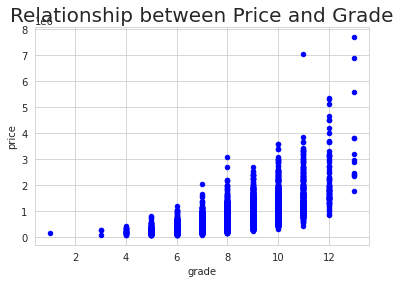

In [ ]:
#CORELATION BETWEEN PRICE AND GRADE
house.plot.scatter(x = 'grade' , y = 'price' ,color='Blue')
plt.title('Relationship between Price and Grade', fontsize = 20)

Text(0.5, 1.0, 'Relationship between Price and Bathroom')

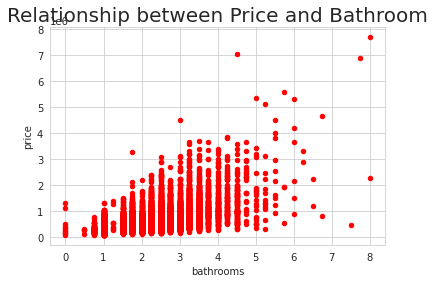

In [ ]:
#CORELATION BETWEEN PRICE AND BATHROOMS
house.plot.scatter(x = 'bathrooms' , y = 'price' ,color='Red')
plt.title('Relationship between Price and Bathroom', fontsize = 20)

Text(0.5, 1.0, 'Relationship between Price and Sqft above')

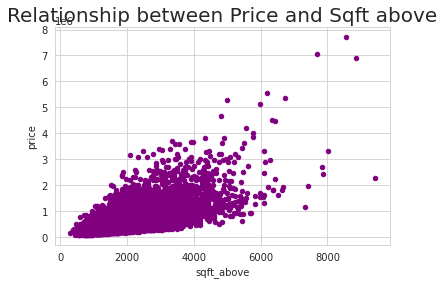

In [ ]:
#CORELATION BETWEEN PRICE AND SQUARE FEET AREA ABOVE
house.plot.scatter(x = 'sqft_above' , y = 'price' ,color='Purple')
plt.title('Relationship between Price and Sqft above', fontsize = 20)

Text(0.5, 1.0, 'Relationship between Sqft living15 and Sqft living')

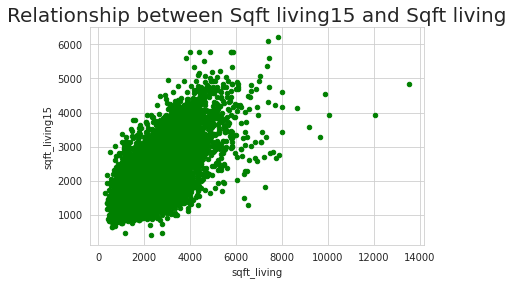

In [ ]:
#COREALTION BETWEEN SQUARE FEET AREA OF LIVING 15 AND SQUARE FEET AREA OF THE LIVING
house.plot.scatter(x = 'sqft_living' , y = 'sqft_living15' ,color='Green')
plt.title('Relationship between Sqft living15 and Sqft living', fontsize = 20)

# 6.Regression analysis
## i).Multiple Linear Regression

In [8]:
#FIRST OFF WE CHECK FOR COLLINEARITY BETWEEN THE INDEPENDENT VARIABLES
#we remove the price and id column first
independent_only = house.drop(columns=['id', 'price'])
correlations = independent_only.corr()

correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050


In [9]:
#VIF score
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.652063,-0.461171,-2.008676e-01,0.049361,0.049695,0.063235,0.114111,-0.050767,0.307048,-6.972236e-01,-3.917356e-01,0.134498,0.045454,0.080112,0.050789,0.017395,0.025213,0.085400
bathrooms,-0.461171,3.350793,-5.070017e+00,-0.024127,-0.675075,0.009760,-0.041645,-0.137020,-0.268005,3.297507e+00,1.361319e+00,-0.935779,-0.259782,0.041796,-0.040956,0.054055,0.092133,0.071471
sqft_living,-0.195112,-5.070968,-3.387473e+13,-0.124292,0.517523,0.452960,-0.595293,-0.364585,-0.782797,3.054236e+13,1.632343e+13,1.666560,0.064558,-0.144633,0.023069,-0.119959,-0.995106,-0.184207
sqft_lot,0.049361,-0.024127,-1.215571e-01,2.102522,0.045263,0.027310,-0.058998,0.030561,-0.053851,-8.958608e-02,1.590428e-02,0.098762,0.021443,-0.002610,0.053366,-0.133162,0.163944,-1.459319
floors,0.049695,-0.675075,5.161519e-01,0.045263,2.011907,-0.005281,-0.040627,0.089673,-0.230851,-9.690373e-01,3.660692e-01,-0.481480,-0.080603,-0.170766,-0.127637,0.164067,0.272617,0.072658
waterfront,0.063235,0.009760,4.537164e-01,0.027310,-0.005281,1.203766,-0.492545,-0.012670,0.049240,-5.211827e-01,-2.223170e-01,-0.021050,-0.065403,0.022551,0.009896,0.027438,0.054452,-0.018470
view,0.114111,-0.041645,-5.974237e-01,-0.058998,-0.040627,-0.492545,1.435160,-0.021475,-0.185237,5.780078e-01,3.143729e-02,0.151620,-0.040236,-0.140679,0.118486,0.071508,-0.325615,-0.007493
condition,-0.050767,-0.137020,-3.648770e-01,0.030561,0.089673,-0.012670,-0.021475,1.249475,-0.054454,3.844299e-01,7.842648e-02,0.561549,0.206672,0.161268,0.063674,-0.007029,0.075861,-0.028255
grade,0.307048,-0.268005,-7.817274e-01,-0.053851,-0.230851,0.049240,-0.185237,-0.054454,3.417046,-9.050863e-01,-1.093873e-01,-0.638980,-0.071422,0.083321,-0.330869,0.393834,-0.911603,0.071874
sqft_above,-0.699237,3.298868,3.054236e+13,-0.087299,-0.970915,-0.520497,0.576283,0.384281,-0.903908,-2.753782e+13,-1.471765e+13,-0.982632,-0.059132,0.054687,0.160271,-0.233522,-0.638496,-0.009635


**The VIF score of area of the basement is the highest  with a -7 followed by grade with a 3.5 ,grade with a 3.42,area of living with a 3.39 ,bathroom with 3.35 and area of living15 with a 3**

In [10]:
revised = independent_only.drop(columns=['sqft_basement'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.652063,-0.461171,-1.005208,0.049361,0.049695,0.063235,0.114111,-0.050767,0.307048,0.031167,0.134498,0.045454,0.080112,0.050789,0.017395,0.025213,0.085400
bathrooms,-0.461171,3.350793,-2.240195,-0.024127,-0.675075,0.009760,-0.041645,-0.137020,-0.268005,0.746567,-0.935779,-0.259782,0.041796,-0.040956,0.054055,0.092133,0.071471
sqft_living,-1.005208,-2.240195,8.656765,-0.088406,1.276899,-0.007673,-0.532143,-0.202339,-1.009241,-5.030384,0.509027,-0.029046,-0.168787,-0.168448,0.306672,-0.977700,-0.123622
sqft_lot,0.049361,-0.024127,-0.088406,2.102522,0.045263,0.027310,-0.058998,0.030561,-0.053851,-0.119655,0.098762,0.021443,-0.002610,0.053366,-0.133162,0.163944,-1.459319
floors,0.049695,-0.675075,1.276899,0.045263,2.011907,-0.005281,-0.040627,0.089673,-0.230851,-1.655588,-0.481480,-0.080603,-0.170766,-0.127637,0.164067,0.272617,0.072658
waterfront,0.063235,0.009760,-0.007673,0.027310,-0.005281,1.203766,-0.492545,-0.012670,0.049240,-0.105178,-0.021050,-0.065403,0.022551,0.009896,0.027438,0.054452,-0.018470
view,0.114111,-0.041645,-0.532143,-0.058998,-0.040627,-0.492545,1.435160,-0.021475,-0.185237,0.519345,0.151620,-0.040236,-0.140679,0.118486,0.071508,-0.325615,-0.007493
condition,-0.050767,-0.137020,-0.202339,0.030561,0.089673,-0.012670,-0.021475,1.249475,-0.054454,0.237995,0.561549,0.206672,0.161268,0.063674,-0.007029,0.075861,-0.028255
grade,0.307048,-0.268005,-1.009241,-0.053851,-0.230851,0.049240,-0.185237,-0.054454,3.417046,-0.699740,-0.638980,-0.071422,0.083321,-0.330869,0.393834,-0.911603,0.071874
sqft_above,0.031167,0.746567,-5.030384,-0.119655,-1.655588,-0.105178,0.519345,0.237995,-0.699740,6.957060,0.061031,0.025263,0.076464,0.332947,-0.618185,-0.654190,-0.064260


**we can see that the VIF score of sqft living skyrocketed to 8 while for sqft above went to 6 

In [11]:
revised_b = independent_only.drop(columns=['sqft_living','sqft_above'])

correlations = revised_b.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.496499,-0.687499,0.013923,-0.039948,0.043309,0.121142,-0.040891,0.020915,-0.246708,0.226929,0.045289,0.066652,0.082975,-0.043341,-0.247769,0.054164
bathrooms,-0.687499,3.021510,-0.075686,-0.805495,-0.019229,-0.031417,-0.122651,-0.684297,-0.733702,-0.801303,-0.260021,0.022214,0.005871,-0.034309,-0.305025,0.026027
sqft_lot,0.013923,-0.075686,2.094449,0.024842,0.022771,-0.057396,0.032811,-0.119034,0.011543,0.119818,0.021406,-0.005677,0.060698,-0.146998,0.101757,-1.466434
floors,-0.039948,-0.805495,0.024842,1.960252,-0.016763,-0.036575,0.095364,-0.395734,0.752268,-0.428217,-0.080698,-0.178522,-0.109090,0.129069,0.115313,0.054659
waterfront,0.043309,-0.019229,0.022771,-0.016763,1.201214,-0.491645,-0.011405,0.012590,0.026746,-0.009211,-0.065424,0.020827,0.014019,0.019658,0.019486,-0.022471
view,0.121142,-0.031417,-0.057396,-0.036575,-0.491645,1.434842,-0.021921,-0.172305,-0.267168,0.147443,-0.040229,-0.140071,0.117032,0.074253,-0.313278,-0.006081
condition,-0.040891,-0.122651,0.032811,0.095364,-0.011405,-0.021921,1.248848,-0.036288,-0.112592,0.555681,0.206682,0.162123,0.061630,-0.003173,0.093192,-0.026272
grade,0.020915,-0.684297,-0.119034,-0.395734,0.012590,-0.172305,-0.036288,2.890752,-0.049161,-0.468971,-0.071725,0.058564,-0.271668,0.282121,-1.413706,0.014422
sqft_basement,-0.246708,-0.733702,0.011543,0.752268,0.026746,-0.267168,-0.112592,-0.049161,1.647007,0.104069,-0.013745,-0.060770,-0.130347,0.240573,-0.054056,-0.011848
yr_built,0.226929,-0.801303,0.119818,-0.428217,-0.009211,0.147443,0.555681,-0.468971,0.104069,2.375731,0.534022,0.264861,0.291298,-0.469546,0.239910,-0.015181


**all scores dropped now so we can clearly see that area of living area,basement and above are collinear**

In [12]:
#NOW WE CREATE OUR MODEL BASED ON OUR REVISED SET OF INDEPENDENT VARIABLES
X = revised_b.values
y = house['price'].values

# split the data into 80% training data and 20% test data
X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.2, random_state=0)

#initialize the  linear regression model
regressor = LinearRegression()
#Train the model with our training data
regressor.fit(X_train, price_train)
# This is our prediction for price based on our model
price_predict = regressor.predict(X_test)
price_predict

array([ 345845.77190534, 1465896.59078389,  482099.28613573, ...,
        390752.46001612,  200945.02723523,  464295.07722289])

In [ ]:
#Checking the actual values
price_test

array([ 297000., 1580000.,  562100., ...,  369950.,  300000.,  575950.])

**WE CAN CLEARLY SEE THAT THE MODEL WAS QUITE CLOSE TO THE ACTUAL VALUES **

In [ ]:
#Checking the weight/coefficients of each feature/column of our model
print(regressor.coef_) # y = mx + c


[-5.55576265e+03  9.17987379e+04  3.20270316e-01  3.57451321e+04
  6.53947017e+05  5.14897981e+04  2.32164626e+04  1.36637671e+05
  5.72721402e+01 -3.18345897e+03  2.04874344e+01 -5.29049832e+02
  5.62889440e+05 -1.46516008e+05  9.41223474e+01 -2.71904717e-01]


In [ ]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

3035.1845075247115

In [ ]:
pd.DataFrame(residuals).describe()

,0
count,4.323000e+03
mean,3.035185e+03
std,1.994538e+05
min,-3.711504e+06
25%,-7.474142e+04
50%,1.372618e+04
75%,1.031900e+05
max,1.042132e+06


So we are trying to predict the price  which is quite a continuous variable
As we can see that our mean is far from 0 so we need to check whether this is a common occurence or just a few outliers

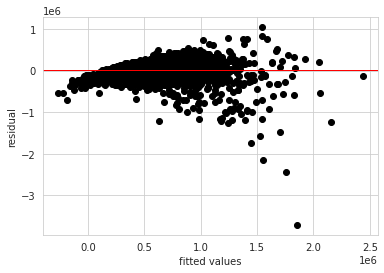

In [ ]:
#Lets Show the residual plot

plt.scatter(price_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

From the looks of it it does not seem too bad as the residual are more centered around the mean that is close to 0. BUT still we need to be thorough by completing with a heteroskedasticity test

In [ ]:
#HETEROSKEDASTICITY TEST USING THE BARLETT'S TEST

test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


In [ ]:
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## ii).Quantile Regression

In [13]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ X', house)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is -64.1312 and our slope or the coefficient for our x's is shown below
# These are the parameters for the 0.5th quantile of our y. 

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4210
Model:                       QuantReg   Bandwidth:                   2.195e+04
Method:                 Least Squares   Sparsity:                    3.071e+05
Date:                Thu, 22 Oct 2020   No. Observations:                21613
Time:                        17:55:56   Df Residuals:                    21596
                                        Df Model:                           16
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -64.1312      4.607    -13.919      0.000     -73.162     -55.100
X[0]       -9020.1472   1369.327     -6.587      0.000   -1.17e+04   -6336.164
X[1]        3.638e+04   2356.988     15.436      0.000    3.18e+04     4.1e+04
X[2]           0.2766      0.036      7.589      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [22]:
X

In [ ]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []
X = np.vectorize(X)
#X = int(X)

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(house = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

In [ ]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(X_, y_,  color='black')
plt.plot(X_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['X'] * X_
plt.plot(X_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['X'] * X_
plt.plot(X_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['X'] * X_
plt.plot(X_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("")
plt.ylabel("y and predicted y")
plt.title("Quantile regression ")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

In [ ]:
## Plot the changes in the quantile coeffiecients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--']
plt.show()

## iii).Ridge Regression

In [ ]:
# first of all we create a model with no regularization on it
regression = LinearRegression()
regression.fit(X,y)
first_modelridge  = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_modelridge)

45098038431.446815


In [ ]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
# The best_params_ tells us what to set alpha too which in this case is 0.001.
{'alpha': 0.001}
abs(search.best_score_) 
# The best_score_ tells us what the best possible mean squared error is. 
# Which in this case is 45468385090.42895

45468385090.42895

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X,y)
second_modelridge = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_modelridge)

45098124950.737656


In [ ]:
# The 45098124950.74 is lower than the 45468385090.43 This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,house.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 18996.54500449272,
 'bedrooms': 11399.090611851743,
 'condition': -92886.98451222421,
 'floors': 15493.009975682911,
 'grade': 7990.988436835685,
 'id': -6600.961350983356,
 'price': 70538.87748562478,
 'sqft_above': -28860.360359087128,
 'sqft_basement': 78005.09047182492,
 'sqft_living': 53858.77987656693,
 'sqft_lot': 39357.05009846244,
 'view': 25691.521747548795,
 'waterfront': 161920.91005796456,
 'yr_built': -19850.518713398935,
 'yr_renovated': 61695.61525832299,
 'zipcode': -5083.032507429657}

## iv).Lasso Regression

In [ ]:
# first of all we create a model with no regularization on it as our baseline model
regression = LinearRegression()
regression.fit(X,y)
first_model1 = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model1)

45098038431.44682


In [ ]:
#Since we have already done all our preliminaries until the creation of feature and target variables a couple of time in the previous regressions
#We will head out straight to scaling our data

#Scaling our data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [ ]:

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6658136262941116
lasso MSE: 45098038456.15141
lasso coef: [ -6598.28348401  70537.46558872  11395.49921448  18994.59159539
  53858.1318314   39357.13012045  15492.19306476 161921.21962612
  25690.47685886 -92884.96583948   7990.5175924  -28857.46332526
  78004.16871932 -19848.60053756  61694.28366047  -5079.47352341]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6761613464964409
linear score: 0.6761728997402067
lasso MSE: 45974360890.79314
linear MSE: 45972720712.906395
lasso best estimator coef: [ -5137.86087951  65577.78902382  11393.72487275  21016.43583772
  50634.38159491  38652.5465132   17107.23497576 161421.81804565
  24329.30233473 -92261.30149547   6745.80723665 -29079.01874931
  78578.34553214 -20324.58681166  63128.75947112  -3901.9482381 ]
linear coef: [ -5207.87855974  65613.04257149  11476.95952253  21062.93246888
  50648.80269807  38649.70418325  17125.65465054 161419.42522195
  24356.71331856 -92311.81200251   6757.17550433 -29147.90349536
  78599.4466259  -20368.1225586   63158.63265428  -3986.15369063]


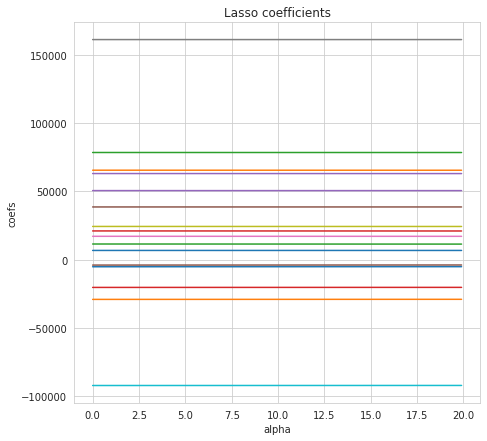

In [ ]:
# Building Lasso for 200 values of alpha and write the coefficients into array
# 
coefsLasso = []
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

## v).Elastic Net Regression

In [ ]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_modelelastic=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_modelelastic)
# This mean standard error score of 45098038431.45 is our benchmark for determining 

45098038431.446815


In [ ]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,revised_b.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 70538.87748562478,
 'bedrooms': -6600.961350983356,
 'condition': 15493.009975682911,
 'floors': 18996.54500449272,
 'grade': 161920.91005796456,
 'lat': 78005.09047182492,
 'long': -19850.518713398935,
 'sqft_basement': 25691.521747548795,
 'sqft_living15': 61695.61525832299,
 'sqft_lot': 11399.090611851743,
 'sqft_lot15': -5083.032507429657,
 'view': 39357.05009846244,
 'waterfront': 53858.77987656693,
 'yr_built': -92886.98451222421,
 'yr_renovated': 7990.988436835685,
 'zipcode': -28860.360359087128}

In [ ]:
#Since this regression requires we normalize data like its two constituents regressions(lasso,ridge)
#and the argument is in the ElasticNet function
#so we create our grid
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

45468385090.42895

In [ ]:
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_modelelastic=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_modelelastic)

89608759713.66335


In [ ]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,revised_b.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 21715.768215398726,
 'bedrooms': 11516.304945408217,
 'condition': 3353.961165721383,
 'floors': 10014.68763974591,
 'grade': 30365.487164831382,
 'lat': 16533.420278390968,
 'long': -1348.3666562622484,
 'sqft_basement': 14400.570058173316,
 'sqft_living15': 25596.70262659495,
 'sqft_lot': 3346.74816077464,
 'sqft_lot15': 2682.8704267535118,
 'view': 18000.214217797868,
 'waterfront': 12892.430308024985,
 'yr_built': -1835.021480073796,
 'yr_renovated': 6223.758475496122,
 'zipcode': -1309.9327171187858}

# Conclusion


We will compare each model with their various MSE's and also the linear regression model as their baseline model
* linear regression model = 45098038431.44
* quantile regrression model = 
* ridge ression model = 45098124950.73
* lasso regression model = 45974360890.79314
* Elastic Net regression model = 89608759713.66335


we can see from the above MSE's that the ridge regression worked quite the best optimally